In [ ]:
#Author: Jaden Mahoney . . . code duplicated from Joseph Lee
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import keras

from skimage.transform import resize

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


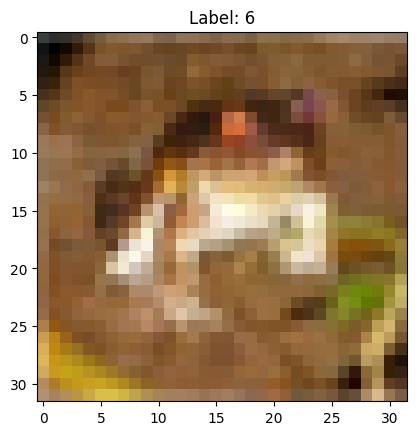

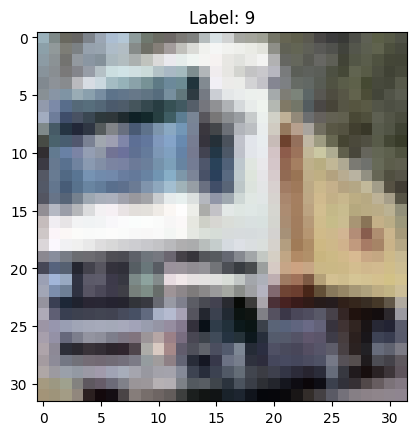

In [6]:
# Show first image
plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0][0]}")
plt.show()

# Show second image
plt.imshow(x_train[1])
plt.title(f"Label: {y_train[1][0]}")
plt.show()

In [8]:
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

print('One-hot encoded label of second image:', y_train_one_hot[1])


One-hot encoded label of second image: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(x_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [ ]:
from keras.layers import Input

model = Sequential()
model.add(Input(shape=(32,32,3)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
hist = model.fit(
    x_train, y_train_one_hot,
    batch_size=32,
    epochs=20,
    validation_split=0.2
)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.3460 - loss: 1.7593

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
test_accuracy = model.evaluate(x_test, y_test_one_hot)[1]
print("Test accuracy:", test_accuracy)

In [ ]:
model.save('my_cifar10_model.h5')

In [ ]:

my_image = plt.imread("cat.jpg")
my_image_resized = resize(my_image, (32,32,3))
plt.imshow(my_image_resized)
plt.show()

probabilities = model.predict(np.array([my_image_resized]))
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])

for i in range(1, 6):
    print(f"{i}.) {number_to_class[index[-i]]} -- Probability: {probabilities[0,index[-i]]}")